# Instructions


1. Given previous weather forcast data implement a model to predict whether or not it will rain tomorrow. 
2. <b>Evaluate your results. cross-validate your results using CV algorithm of your choice with 10 folds </b> 

## Beat the Baseline of 50% to pass the lab. Anything above 65% gets you a full score.

# About The Dataset


This dataset contains observations of weather metrics for each day from 2008 to 2017. The dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |



In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, f1_score, precision_score
import sklearn.metrics as metrics

### Importing the Dataset


In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')


In [4]:
df.head()
# len(df)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### Transforming Categorical Variables


First, we need to convert categorical variables to binary variables. We will use pandas `get_dummies()` method for this.


In [5]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_sydney_processed

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,0,0,0,0,0,1,0,0,0,0
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,0,0,0,0,0,0,0,0,0,0
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,0,0,0,0,0,0,0,0,0,0
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,0,0,0,0,0,0,0,0,0,0
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,37,22,20,73,...,0,0,0,0,1,0,0,0,0,0
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,30,20,7,78,...,0,0,0,0,0,0,0,0,0,0
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,24,15,13,85,...,0,0,0,0,0,0,0,0,0,0
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,43,17,19,56,...,0,0,0,0,0,0,0,1,0,0


Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [6]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

Check for missing and duplicate values

In [7]:
df_sydney_processed.drop_duplicates(inplace=True)
df_sydney_processed.isna().sum()

Date              0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 68, dtype: int64

In [8]:
df_sydney_new = df_sydney_processed[df_sydney_processed['RainTomorrow'] == 1]
df_sydney_new.RainTomorrow

0       1
1       1
2       1
3       1
4       1
       ..
3255    1
3256    1
3258    1
3262    1
3264    1
Name: RainTomorrow, Length: 849, dtype: int64

### Plotting a pie chart to check if the dataset is imbalanced

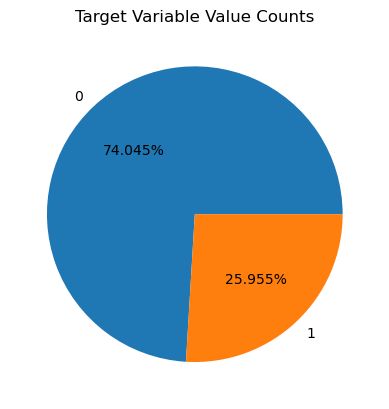

In [9]:
# labels = df_sydney_processed.RainTomorrow.unique()
sizes = df_sydney_processed.RainTomorrow.value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=[0, 1], autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

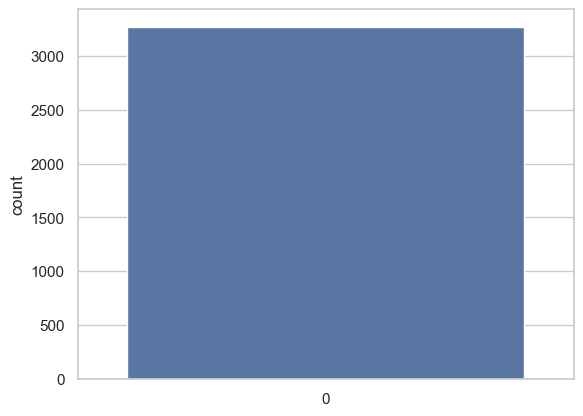

In [10]:
sns.set(style="whitegrid")
sns.countplot(df_sydney_processed.RainTomorrow)
plt.show()

<AxesSubplot: >

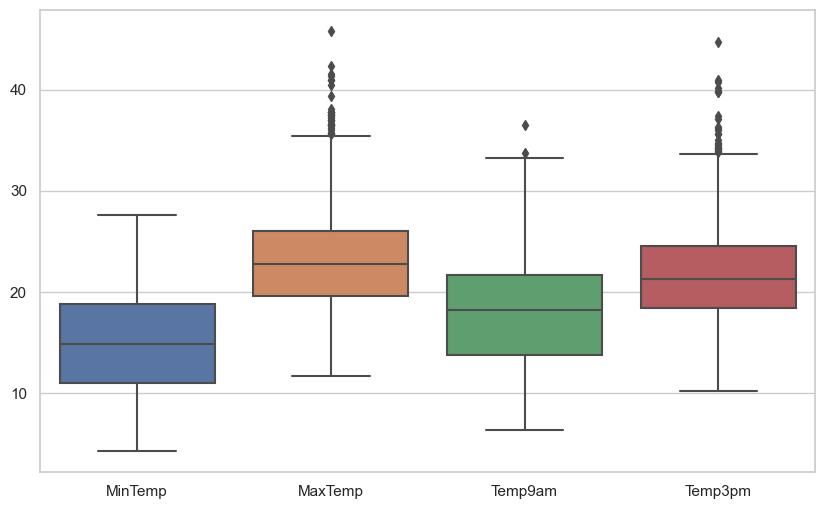

In [11]:
#check for outliers if need be using this code here
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sydney_processed[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [12]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [13]:
df_sydney_processed = df_sydney_processed.astype(float)

In [14]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

#### Q1) Using `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [15]:
x_train, x_test, y_train, y_test =  train_test_split(features, Y, test_size=0.2, random_state=10)

In [16]:
# x_train, x_cv, y_train, y_cv = train_test_split(features, Y, test_size=0.2, random_state=10)

In [17]:
# eval_set = ([x_train, y_train], [x_cv, y_cv])

#### Create and train your model using the training data (`x_train`, `y_train`).


In [18]:
#Your code here
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='error')
cv = cross_val_score(xgb, features, Y, cv=10)
print(cv)
print(cv.mean())


[0.84756098 0.83486239 0.78593272 0.80733945 0.86850153 0.83180428
 0.82262997 0.80428135 0.83792049 0.83180428]
0.8272637428209144


In [19]:
xgb.fit(x_train, y_train)
# xgb.fit(x_train, y_train, eval_set=eval_set, early_stopping_rounds=10, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [20]:
#Your code here
predictionsXGB = xgb.predict(x_test)

In [21]:
predictionstrainXGB = xgb.predict(x_train)

#### Using the `predictions` and the `y_test` dataframe Evaluate your model and cross validate your results

In [22]:
#Enter Your Code, Execute and take the Screenshot
accuracyXGB = accuracy_score(y_test, predictionsXGB)

In [23]:
accuracytrainXGB = accuracy_score(y_train, predictionstrainXGB)

In [24]:
accuracytrainXGB, accuracyXGB

(1.0, 0.8320610687022901)

In [25]:
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

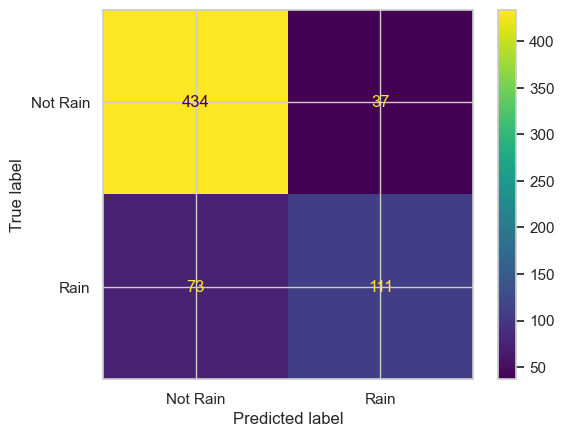

In [26]:
con_mat = confusion_matrix(y_test, predictionsXGB)
con_disp = ConfusionMatrixDisplay(con_mat, display_labels=['Not Rain', 'Rain'])
con_disp.plot()
plt.show()

In [27]:
precision = precision_score(y_test, predictionsXGB)
recall = recall_score(y_test, predictionsXGB)
f1 = f1_score(y_test, predictionsXGB)

print("Accuracy: {:.3f}".format(accuracyXGB))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))

Accuracy: 0.832
Precision: 0.750
Recall: 0.603
F1 score: 0.669


### Logistic

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [29]:
lr.fit(x_train, y_train)

LogisticRegression()

In [30]:
# predictionscv = lr.predict(x_cv)
predictionsLR = lr.predict(x_test)
predictionstrainLR = lr.predict(x_train)

In [31]:
accuracyLR = accuracy_score(y_test, predictionsLR)
accuracytrainLR = accuracy_score(y_train, predictionstrainLR)
# accuracycv = accuracy_score(y_cv, predictionscv)


In [32]:
cross_val_score(lr, features, Y, cv=10).mean()

0.8342936525695531

In [33]:
accuracyLR, accuracytrainLR
# , accuracycv

(0.8442748091603054, 0.8402140672782875)

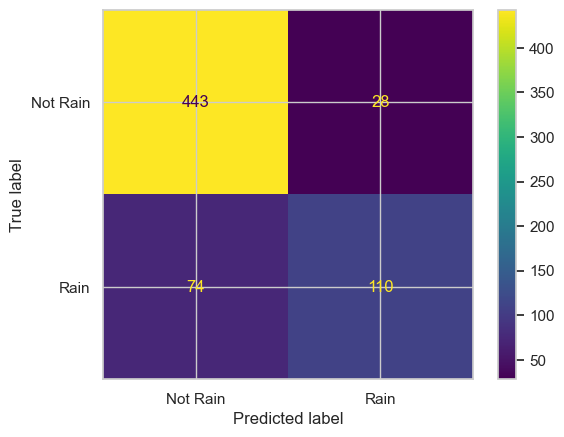

In [34]:
con_mat = confusion_matrix(y_test, predictionsLR)
con_disp = ConfusionMatrixDisplay(con_mat, display_labels=['Not Rain', 'Rain'])
con_disp.plot()
plt.show()

In [35]:
precision = precision_score(y_test, predictionsLR)
recall = recall_score(y_test, predictionsLR)
f1 = f1_score(y_test, predictionsLR)

print("Accuracy: {:.3f}".format(accuracyLR))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))

Accuracy: 0.844
Precision: 0.797
Recall: 0.598
F1 score: 0.683


### Neural Networks

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [38]:
model = Sequential([
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss=tf.keras.losses.BinaryCrossentropy() ,metrics=['accuracy'])

In [40]:
history = model.fit(x_train_scaled, y_train, batch_size=32, validation_split=0.1, epochs=25)

Epoch 1/25
74/74 [==============================] - 5s 9ms/step - loss: 0.5186 - accuracy: 0.7375 - val_loss: 0.4778 - val_accuracy: 0.7977
Epoch 2/25
74/74 [==============================] - 0s 4ms/step - loss: 0.4634 - accuracy: 0.7553 - val_loss: 0.5346 - val_accuracy: 0.7405
Epoch 3/25
74/74 [==============================] - 0s 4ms/step - loss: 0.5017 - accuracy: 0.7375 - val_loss: 0.4938 - val_accuracy: 0.7405
Epoch 4/25
74/74 [==============================] - 0s 4ms/step - loss: 0.4621 - accuracy: 0.7443 - val_loss: 0.4650 - val_accuracy: 0.7405
Epoch 5/25
74/74 [==============================] - 0s 4ms/step - loss: 0.4902 - accuracy: 0.7494 - val_loss: 0.5164 - val_accuracy: 0.7405
Epoch 6/25
74/74 [==============================] - 0s 4ms/step - loss: 0.4800 - accuracy: 0.7362 - val_loss: 0.5008 - val_accuracy: 0.7405
Epoch 7/25
74/74 [==============================] - 0s 4ms/step - loss: 0.4716 - accuracy: 0.7481 - val_loss: 0.4782 - val_accuracy: 0.7557
Epoch 8/25
74/74 [==

##### Is not getting above 0.74 accuracy

### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(6)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [42]:
predictionstrainKNN = knn.predict(x_train)
predictionsKNN = knn.predict(x_test)

In [43]:
accuracytrainKNN = accuracy_score(y_train, predictionstrainKNN)
accuracyKNN = accuracy_score(y_test, predictionsKNN)

In [44]:
cross_val_score(knn, features, Y).mean()

0.8211518080164344

In [45]:
precision = precision_score(y_test, predictionsKNN)
recall = recall_score(y_test, predictionsKNN)
f1 = f1_score(y_test, predictionsKNN)

# print("Accuracy: {:.3f}".format(accuracyKNN))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))

Precision: 0.833
Recall: 0.516
F1 score: 0.638


##### F1 score is not good. LR is still better

In [46]:
# 0.516 + 0.087

0.603

#### Discuss your findings 

## Without computing weights

### XGBClassifier vs LogisticRegresion vs KNNClassifier

In [47]:
print("Train accuracies")
print("LR: {:.3f}".format(accuracytrainLR))
print("XGB: {:.3f}".format(accuracytrainXGB))
print("KNN: {:.3f}".format(accuracytrainKNN))
print()
print("Test accuracies")
print("LR: {:.3f}".format(accuracyLR))
print("XGB: {:.3f}".format(accuracyXGB))
print("KNN: {:.3f}".format(accuracyKNN))

Train accuracies
LR: 0.840
XGB: 1.000
KNN: 0.849

Test accuracies
LR: 0.844
XGB: 0.832
KNN: 0.835


XGB Classifier, LogisticRegression and KNN has a mean cv score almost similar to each other with 10 folds. XGB has 82%, LogisticRegression has 83% and KNN has also 82% mean cv score. But the XGB seems to be over-fitting as train accuracy on it is 100% and test accuracy is only 83%. I tried tuning the max_depth and also tried early stopping rounds = 10 but it does not seem to generalize to new data. Logistic regresion has low train accuracy i.e. 83% but it also has 84% test accuracy which seems that it is performing better than XGB and also generalizing well to new unseen data. It is performing better than than KNN as it has 83.5% test accuracy. The only difference is that LogisticRegression has just a difference of 0.009 in training accuracy.

I also tried Neural Networks but its accuracy does not improve from the start and gets stuck on 74%. That is why I did not evaluated NN further.

Furthermore, LogisticRegression has better Precision and F1 score than XGB and KNN but XGB is crossing recall against both but it is not that much. 0.005 better than LogisticRegression and 0.087 better than KNN.

In this case, LogisticRegression seems to be working better. These models are evaluated without computing weights to check how well they generalize. In next section, I have tried evaluating the LogisticRegression and XGBoost with balanced weights, and KNN with distance weight.

### Computing weights

In [48]:
from sklearn.utils.class_weight import compute_sample_weight

# compute the sample weights to be used as input to the train routine so that 
# it takes into account the class imbalance present in this dataset
w_train = compute_sample_weight('balanced', y_train)
print(w_train, y_train)

[1.96691729 0.67042542 1.96691729 ... 0.67042542 1.96691729 0.67042542] 3188    1.0
2582    0.0
815     1.0
1024    0.0
1320    1.0
       ... 
3195    0.0
1344    0.0
527     0.0
3197    1.0
1289    0.0
Name: RainTomorrow, Length: 2616, dtype: float64


#### LogisticRegression

In [49]:
lr.fit(x_train_scaled, y_train, sample_weight=w_train)

LogisticRegression()

In [50]:
# predictionscv = lr.predict(x_cv)
predictionsLR = lr.predict(x_test)
predictionstrainLR = lr.predict(x_train)

In [51]:
accuracyLR = accuracy_score(y_test, predictionsLR)
accuracytrainLR = accuracy_score(y_train, predictionstrainLR)
# accuracycv = accuracy_score(y_cv, predictionscv)

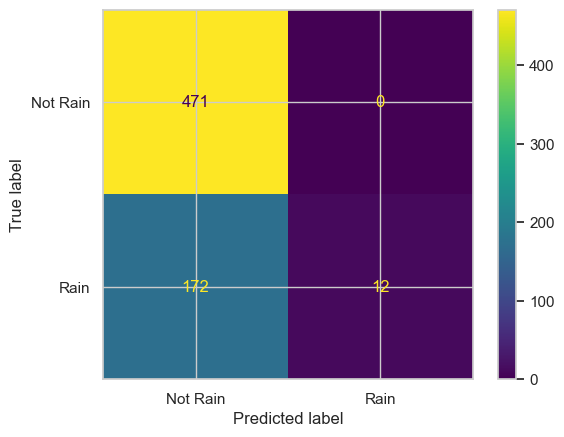

In [52]:
con_mat = confusion_matrix(y_test, predictionsLR)
con_disp = ConfusionMatrixDisplay(con_mat, display_labels=['Not Rain', 'Rain'])
con_disp.plot()
plt.show()

In [53]:
precision = precision_score(y_test, predictionsLR)
recall = recall_score(y_test, predictionsLR)
f1 = f1_score(y_test, predictionsLR)

print("Accuracy: {:.3f}".format(accuracyLR))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))

Accuracy: 0.737
Precision: 1.000
Recall: 0.065
F1 score: 0.122


### KNN

In [54]:
knn = KNeighborsClassifier(6, weights='distance')

In [55]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [56]:
predictionstrainKNN = knn.predict(x_train)
predictionsKNN = knn.predict(x_test)

In [57]:
accuracytrainKNN = accuracy_score(y_train, predictionstrainKNN)
accuracyKNN = accuracy_score(y_test, predictionsKNN)

In [58]:
precision = precision_score(y_test, predictionsKNN)
recall = recall_score(y_test, predictionsKNN)
f1 = f1_score(y_test, predictionsKNN)

print("Accuracy: {:.3f}".format(accuracyKNN))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))

Accuracy: 0.824
Precision: 0.745
Recall: 0.571
F1 score: 0.646


### XGB

In [59]:
xgb.fit(x_train, y_train, sample_weight=w_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
predictionsXGB = xgb.predict(x_test)
predictionstrainXGB = xgb.predict(x_train)

In [61]:
accuracyXGB = accuracy_score(y_test, predictionsXGB)
accuracytrainXGB = accuracy_score(y_train, predictionstrainXGB)

In [62]:
accuracytrainXGB, accuracyXGB

(1.0, 0.8244274809160306)

In [64]:
precision = precision_score(y_test, predictionsXGB)
recall = recall_score(y_test, predictionsXGB)
f1 = f1_score(y_test, predictionsXGB)

print("Accuracy: {:.3f}".format(accuracyXGB))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))

Accuracy: 0.824
Precision: 0.707
Recall: 0.641
F1 score: 0.672


In [63]:
print("Train accuracies")
print("LR: {:.3f}".format(accuracytrainLR))
print("XGB: {:.3f}".format(accuracytrainXGB))
print("KNN: {:.3f}".format(accuracytrainKNN))
print()
print("Test accuracies")
print("LR: {:.3f}".format(accuracyLR))
print("XGB: {:.3f}".format(accuracyXGB))
print("KNN: {:.3f}".format(accuracyKNN))

Train accuracies
LR: 0.751
XGB: 1.000
KNN: 1.000

Test accuracies
LR: 0.737
XGB: 0.824
KNN: 0.824


It looks like that after applying distance weight in KNN, the model is overfitting. XGBoost does not seem to improve even after applying sample weights but improved F1 score a little bit. I cannot determine the possible cause(s) of why XGBoost is overfitting even though the CV score with 10 folds seems to be giving a good mean accuracy. LogisticRegression's performance decreased a lot after applying weights. Its accuracy dropped from 84% to 74% and its F1 score also decreaesd with a large value i.e. from 68% to 12% with biased towards precision (100% precisoin score).

It looks likes that LogisticRegression is the best choice because without applying weights, the model seems to be working better and it is also balancing good between precision and recall thus giving a good F1 score with better accuracy.